In [67]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_context('talk')

In [68]:
demographics = pd.read_csv("../raw_data/nc_county_demographics.csv")
demographics.head()
#print(len(demographics.index))

,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,...,HWAC_MALE,HWAC_FEMALE,HBAC_MALE,HBAC_FEMALE,HIAC_MALE,HIAC_FEMALE,HAAC_MALE,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE
0,50,37,1,North Carolina,Alamance County,1,0,151131,71890,79241,...,7202,6823,566,580,962,912,101,94,26,41
1,50,37,1,North Carolina,Alamance County,1,1,9524,4846,4678,...,961,941,96,109,116,141,20,19,3,7
2,50,37,1,North Carolina,Alamance County,1,2,9889,5126,4763,...,897,859,84,71,122,130,14,14,1,3
3,50,37,1,North Carolina,Alamance County,1,3,10008,5078,4930,...,726,725,52,60,119,89,7,8,2,3
4,50,37,1,North Carolina,Alamance County,1,4,11100,5412,5688,...,581,596,44,44,80,81,7,5,3,4


In [69]:
abortion_dem = pd.read_csv("../raw_data/race_abortion_data.csv")
abortion_dem.head()

,RESIDENCE:,Total Abortions,Rate,White Non-Hispanic,Rate.1,Af. An. Non-Hispanic,Rate.2,Am. Ind. Non-Hispanic,Rate.3,Other Non-Hispanic,Rate.4,Hispanic,Rate.5
0,NORTH CAROLINA,"23,495",11.4,"7,261",6,"10,703",21.1,249,9.5,818,9.2,"3,071",13.3
1,PCR I WESTERN,888,6.4,631,5.5,108,15.3,6,*,19,*,75,6.7
2,PCR II NORTHWESTERN,"4,476",10,"1,571",5.5,"1,982",20.7,25,13.4,136,8.1,512,10.8
3,PCR III SOUTHWESTERN,"5,894",13.6,"1,386",6,"2,899",23.7,33,21,279,11,954,17.7
4,PCR IV NORTHEASTERN,"5,566",11.3,"1,567",5.7,"2,605",21.3,34,15.6,258,7.7,814,13.5


In [70]:
demographics = demographics[(demographics["YEAR"] == 7) & (demographics["AGEGRP"] == 0)]
print(len(demographics.index))

#black
demographics["black_perc"] = (demographics["BAC_MALE"]+demographics["BAC_FEMALE"]) / demographics["TOT_POP"]
black = demographics[["COUNTY","CTYNAME","black_perc"]]
black.head()

100


,COUNTY,CTYNAME,black_perc
114,1,Alamance County,0.208432
342,3,Alexander County,0.066969
570,5,Alleghany County,0.023597
798,7,Anson County,0.497863
1026,9,Ashe County,0.013563


In [71]:
#nonwhite
demographics["nonwhite_perc"] = 1 - ((demographics["WA_MALE"]+demographics["WA_FEMALE"]) / demographics["TOT_POP"])
non_white = demographics[["COUNTY","CTYNAME","nonwhite_perc"]]
non_white.head()

,COUNTY,CTYNAME,nonwhite_perc
114,1,Alamance County,0.245180
342,3,Alexander County,0.087652
570,5,Alleghany County,0.041778
798,7,Anson County,0.523204
1026,9,Ashe County,0.027537


In [72]:
nc_map = gpd.read_file('../data/nc_county_2020_shp')
nc_map.head()
#nc_map.plot()

,STATEFP20,COUNTYFP20,COUNTYNS20,GEOID20,NAME20,NAMELSAD20,LSAD20,CLASSFP20,MTFCC20,CSAFP20,CBSAFP20,METDIVFP20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry
0,37,135,01008576,37135,Orange,Orange County,06,H1,G4020,450,20500,None,A,1029673918,8806896,+36.0625255,-079.1200340,"POLYGON ((-79.26198 36.03505, -79.26196 36.035..."
1,37,049,01026123,37049,Craven,Craven County,06,H1,G4020,404,35100,None,A,1830014545,172777667,+35.1168292,-077.0813197,"POLYGON ((-77.20903 35.09147, -77.20926 35.091..."
2,37,195,01008596,37195,Wilson,Wilson County,06,H1,G4020,468,48980,None,A,952013027,14332439,+35.7003569,-077.9215978,"POLYGON ((-78.03802 35.78752, -78.03697 35.787..."
3,37,061,01026132,37061,Duplin,Duplin County,06,H1,G4020,None,None,None,A,2110115795,14237879,+34.9344033,-077.9335434,"POLYGON ((-78.15706 35.04038, -78.15781 35.051..."
4,37,087,01008561,37087,Haywood,Haywood County,06,H1,G4020,120,11700,None,A,1433713844,2438478,+35.5588823,-082.9813074,"POLYGON ((-83.15657 35.55209, -83.15606 35.552..."


<AxesSubplot:>

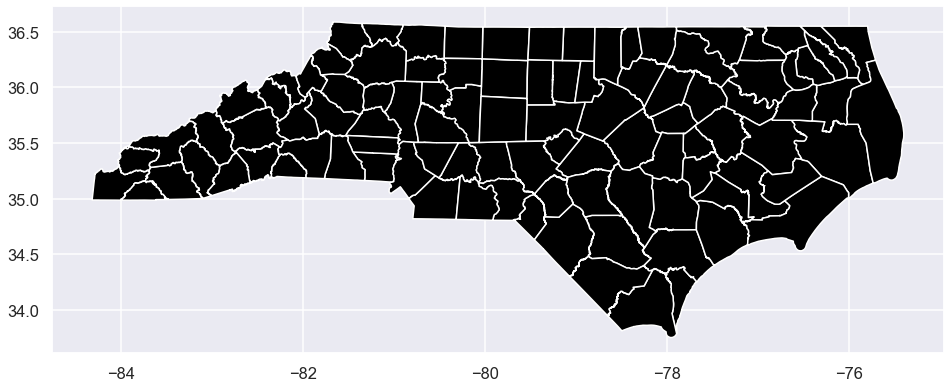

In [73]:
fig, ax = plt.subplots(1, figsize =(16, 8))
nc_map.plot(ax = ax, color ='black')

In [74]:
merged=pd.merge(nc_map, black, how='inner', left_on='NAMELSAD20', right_on='CTYNAME')
merged.head()

,STATEFP20,COUNTYFP20,COUNTYNS20,GEOID20,NAME20,NAMELSAD20,LSAD20,CLASSFP20,MTFCC20,CSAFP20,...,METDIVFP20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry,COUNTY,CTYNAME,black_perc
0,37,135,01008576,37135,Orange,Orange County,06,H1,G4020,450,...,None,A,1029673918,8806896,+36.0625255,-079.1200340,"POLYGON ((-79.26198 36.03505, -79.26196 36.035...",135,Orange County,0.131235
1,37,049,01026123,37049,Craven,Craven County,06,H1,G4020,404,...,None,A,1830014545,172777667,+35.1168292,-077.0813197,"POLYGON ((-77.20903 35.09147, -77.20926 35.091...",49,Craven County,0.232416
2,37,195,01008596,37195,Wilson,Wilson County,06,H1,G4020,468,...,None,A,952013027,14332439,+35.7003569,-077.9215978,"POLYGON ((-78.03802 35.78752, -78.03697 35.787...",195,Wilson County,0.411656
3,37,061,01026132,37061,Duplin,Duplin County,06,H1,G4020,None,...,None,A,2110115795,14237879,+34.9344033,-077.9335434,"POLYGON ((-78.15706 35.04038, -78.15781 35.051...",61,Duplin County,0.269484
4,37,087,01008561,37087,Haywood,Haywood County,06,H1,G4020,120,...,None,A,1433713844,2438478,+35.5588823,-082.9813074,"POLYGON ((-83.15657 35.55209, -83.15606 35.552...",87,Haywood County,0.014831


<AxesSubplot:>

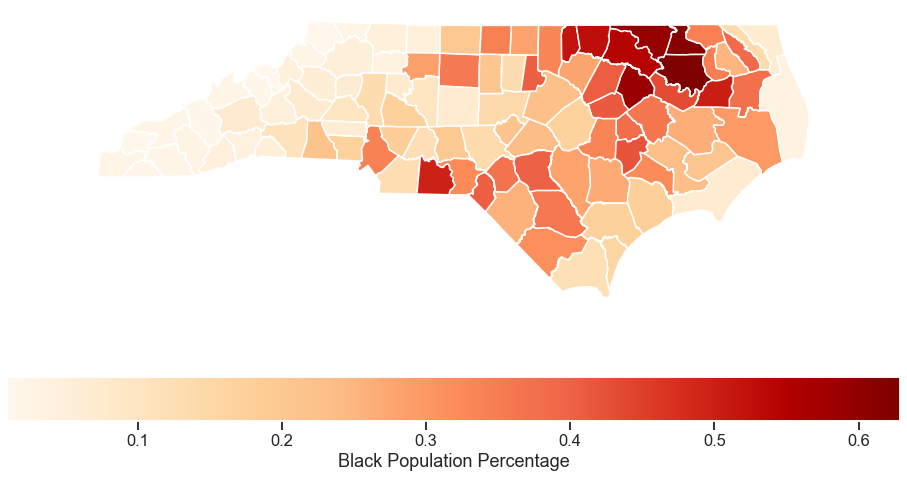

In [75]:
fig, ax = plt.subplots(1, figsize =(16, 8))
ax.axis('off')
merged.plot(column='black_perc', 
            ax = ax, 
            legend=True, 
            cmap='OrRd', 
            legend_kwds={'label': "Black Population Percentage", 'orientation': "horizontal"})

In [ ]:
merged=pd.merge(merged, non_white, how='inner', left_on='CTYNAME', right_on='CTYNAME')
merged.head()

In [ ]:
fig, ax = plt.subplots(1, figsize =(16, 8))
ax.axis('off')
merged.plot(column='nonwhite_perc', 
             ax = ax, 
             legend=True, 
             cmap='OrRd', 
             legend_kwds={'label': "Nonwhite Population Percentage", 'orientation': "horizontal"})

In [ ]:
df = merged[["CTYNAME","nonwhite_perc","black_perc"]]
df.head()
df.to_csv('../data/county_nonwhite_black.csv', index=False)